# Athletes Dataset


This dataset describes 10,383 athletes and their features, including their age, height, weight, country, sex, medals they have won, and the sport they play.

***Problem:*** *Predict what sport each athlete specializes in using specific features (age, height, weight).* <br><br><br>

***Data***

In [42]:
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
athletes_df = pd.read_csv('../hw1-athletes.csv')
athletes_df.head(30)

,name,sport,age,height,weight,country,sex,gold,silver,bronze,total
0,Lamusi A,Judo,23,170,60,People's Republic of China,M,0,0,0,0
1,A G Kruger,Athletics,33,193,125,United States of America,M,0,0,0,0
2,Jamale Aarrass,Athletics,30,187,76,France,M,0,0,0,0
3,Abdelhak Aatakni,Boxing,24,NaN,NaN,Morocco,M,0,0,0,0
4,Maria Abakumova,Athletics,26,178,85,Russian Federation,F,0,0,0,0
5,Luc Abalo,Handball,27,182,80,France,M,0,0,0,0
6,Maria Laura Abalo,Rowing,30,182,73,Argentina,F,0,0,0,0
7,Mohamed Abarhoun,Football,23,187,75,Morocco,M,0,0,0,0
8,Emanuele Abate,Athletics,27,190,80,Italy,M,0,0,0,0
9,Ilyas Abbadi,Boxing,19,170,NaN,Algeria,M,0,0,0,0


<br><br>
***Data Analysis***
<br><br>
10,383 athletes -> 9,038 athletes (eliminating NaN's)
<br>
11 features

In [44]:
athletes_df.shape

(10383, 11)

In [45]:
print(len(athletes_df))
athletes = athletes_df.dropna()
print(len(athletes))

10383
9038


In [46]:
athletes.describe()

,age,height,weight,gold,silver,bronze,total
count,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000,9038.000000
mean,26.363797,177.456849,72.858929,0.017814,0.017703,0.019473,0.054990
std,5.459720,11.202506,16.068781,0.140397,0.135192,0.139781,0.257599
min,13.000000,132.000000,36.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,170.000000,61.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,177.000000,70.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,185.000000,81.000000,0.000000,0.000000,0.000000,0.000000
max,71.000000,221.000000,218.000000,2.000000,2.000000,2.000000,5.000000


***Sport:*** the sport is what we will predict based on some of the other features

In [47]:
athletes['sport'].value_counts()

Athletics                  1901
Swimming                    859
Football                    589
Rowing                      512
Hockey                      383
Sailing                     351
Judo                        341
Shooting                    338
Handball                    304
Wrestling                   296
Volleyball                  271
Basketball                  258
Water Polo                  249
Weightlifting               229
Fencing                     229
Canoe Sprint                224
Equestrian                  181
Cycling - Road              176
Cycling - Track             160
Badminton                   159
Tennis                      156
Table Tennis                151
Diving                      128
Archery                     114
Triathlon                   103
Beach Volleyball             93
Canoe Slalom                 80
Cycling - Mountain Bike      70
Modern Pentathlon            66
Cycling - BMX                42
Cycling                      25
Name: sp

In [48]:
athletes['sport'].value_counts(normalize=True)

Athletics                  0.210334
Swimming                   0.095043
Football                   0.065169
Rowing                     0.056650
Hockey                     0.042377
Sailing                    0.038836
Judo                       0.037730
Shooting                   0.037398
Handball                   0.033636
Wrestling                  0.032751
Volleyball                 0.029985
Basketball                 0.028546
Water Polo                 0.027550
Weightlifting              0.025337
Fencing                    0.025337
Canoe Sprint               0.024784
Equestrian                 0.020027
Cycling - Road             0.019473
Cycling - Track            0.017703
Badminton                  0.017592
Tennis                     0.017260
Table Tennis               0.016707
Diving                     0.014162
Archery                    0.012613
Triathlon                  0.011396
Beach Volleyball           0.010290
Canoe Slalom               0.008852
Cycling - Mountain Bike    0

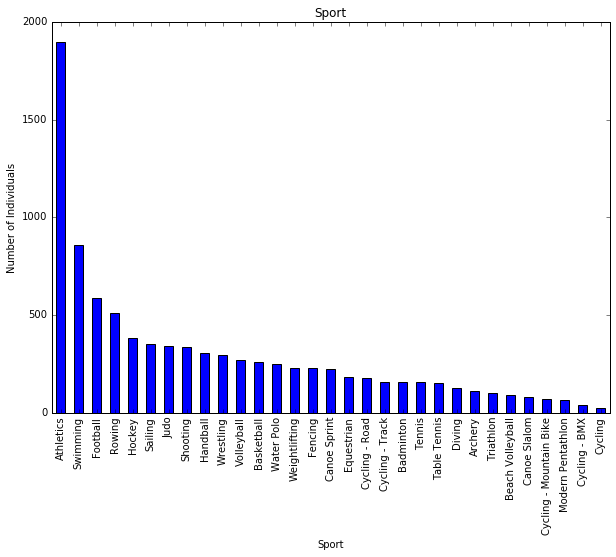

In [49]:
athletes['sport'].value_counts().plot(kind='bar', figsize=(10,7))

plt.title("Sport")

plt.xlabel("Sport")
plt.ylabel("Number of Individuals")

***Age:*** the majority of athletes are in their 20's and early 30's

In [59]:
athletes['age'].value_counts().head(15)

23    775
25    740
24    717
27    698
26    687
22    676
28    557
21    546
29    526
30    458
20    389
31    357
32    302
19    262
33    226
Name: age, dtype: int64

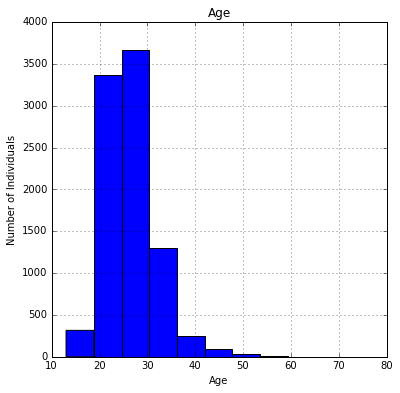

In [51]:
athletes['age'].hist(figsize=(6,6))

plt.title("Age")

plt.xlabel("Age")
plt.ylabel("Number of Individuals")

Incredible to know that there is one athlete at the age of 71!

In [52]:
athletes[athletes['age']>60]

,name,sport,age,height,weight,country,sex,gold,silver,bronze,total
3757,Hiroshi Hoketsu,Equestrian,71,168,61,Japan,M,0,0,0,0
4939,Afanasijs Kuzmins,Shooting,65,178,89,Latvia,M,0,0,0,0
6098,Ian Millar,Equestrian,65,185,76,Canada,M,0,0,0,0


***Height:*** the top 15 heights are between 165cm to 190cm, which in feet is between 5'4 to 6'2

In [53]:
athletes['height'].value_counts().head(15)

180    487
170    470
178    422
175    395
183    344
168    331
172    302
173    300
185    298
165    295
182    277
190    242
188    235
176    229
174    227
Name: height, dtype: int64

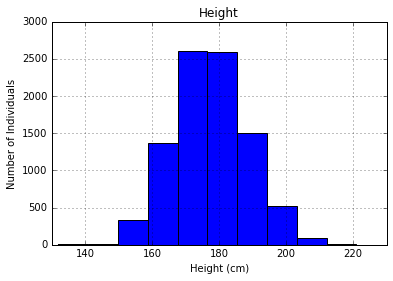

In [60]:
athletes['height'].hist()

plt.title("Height")

plt.xlabel("Height (cm)")
plt.ylabel("Number of Individuals")

***Weight:*** the weight is measured in kilograms. The minimum weight is 36kg or 79 pounds (13 year old), the maximum weight is 218kg or 480 pounds, and the mean weight is 72kg or 158.7 pounds

In [61]:
athletes['weight'].value_counts().head(15)

60    409
70    392
75    313
65    305
68    274
72    265
73    257
62    248
80    236
63    233
55    230
66    224
64    219
58    219
74    210
Name: weight, dtype: int64

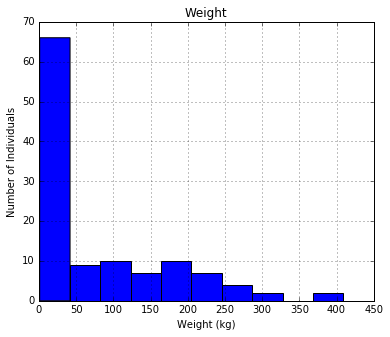

In [62]:
athletes['weight'].value_counts().hist(figsize=(6,5))

plt.title("Weight")

plt.xlabel("Weight (kg)")
plt.ylabel("Number of Individuals")

***Country:*** the top three countries in this dataset are the US, Great Britain and Australia. These athletes are from countries all around the world

In [65]:
athletes['country'].value_counts().head(30)

United States of America      488
Great Britain                 482
Australia                     369
Russian Federation            369
Germany                       361
France                        309
People's Republic of China    303
Japan                         261
Spain                         248
Canada                        245
Italy                         242
Republic of Korea             240
Ukraine                       198
Poland                        188
New Zealand                   179
Netherlands                   174
Brazil                        163
Belarus                       144
Hungary                       131
Argentina                     129
South Africa                  127
Sweden                        125
Czech Republic                124
Belgium                       112
Denmark                       109
Serbia                        104
Colombia                       98
Switzerland                    97
Croatia                        95
Mexico        

In [66]:
athletes['country'].value_counts(normalize=True).head(30)

United States of America      0.053994
Great Britain                 0.053330
Australia                     0.040828
Russian Federation            0.040828
Germany                       0.039942
France                        0.034189
People's Republic of China    0.033525
Japan                         0.028878
Spain                         0.027440
Canada                        0.027108
Italy                         0.026776
Republic of Korea             0.026555
Ukraine                       0.021908
Poland                        0.020801
New Zealand                   0.019805
Netherlands                   0.019252
Brazil                        0.018035
Belarus                       0.015933
Hungary                       0.014494
Argentina                     0.014273
South Africa                  0.014052
Sweden                        0.013830
Czech Republic                0.013720
Belgium                       0.012392
Denmark                       0.012060
Serbia                   

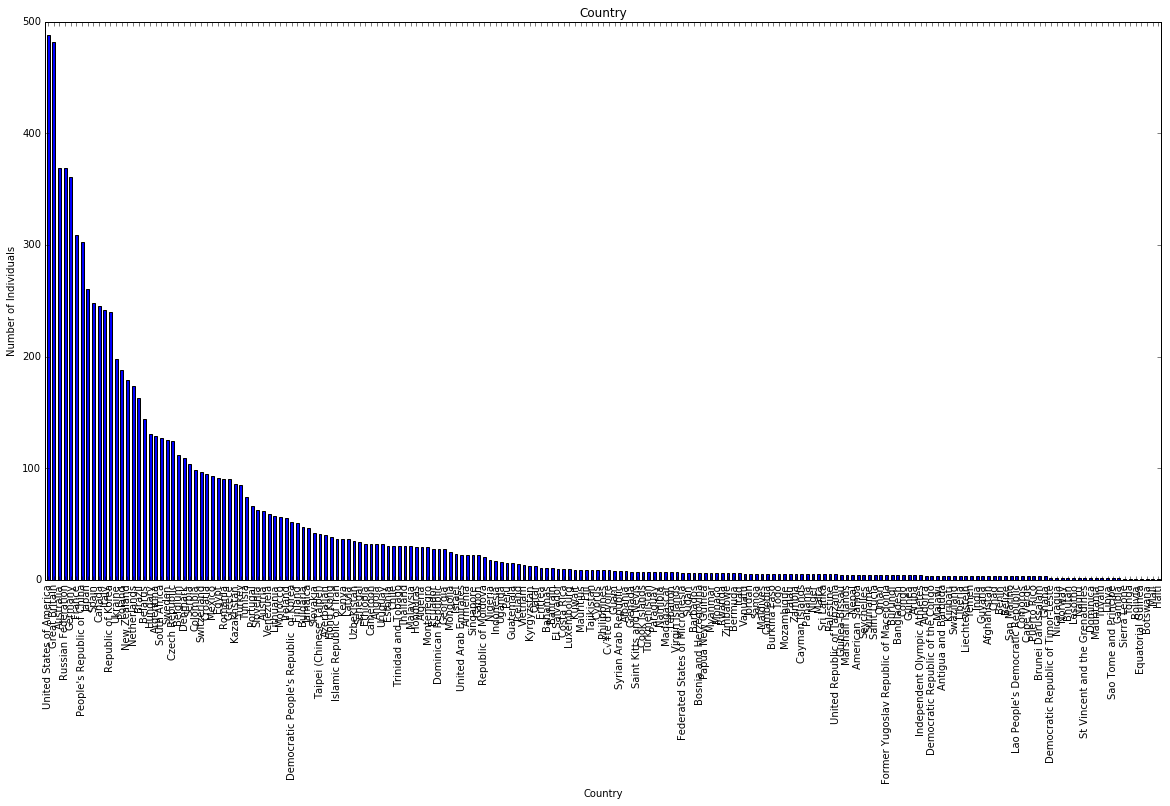

In [72]:
athletes['country'].value_counts().plot(kind='bar', figsize=(20,10))

plt.title("Country")

plt.xlabel("Country")
plt.ylabel("Number of Individuals")

***Sex:*** good proportion between males and females

In [73]:
athletes['sex'].value_counts()

M    5017
F    4021
Name: sex, dtype: int64

In [74]:
athletes['sex'].value_counts(normalize=True)

M    0.555101
F    0.444899
Name: sex, dtype: float64

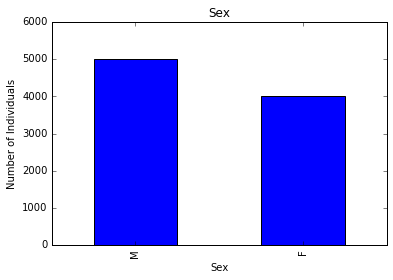

In [75]:
athletes['sex'].value_counts().plot(kind='bar')

plt.title("Sex")

plt.xlabel("Sex")
plt.ylabel("Number of Individuals")

***Gold Medal:***

In [76]:
athletes['gold'].value_counts()

0    8887
1     141
2      10
Name: gold, dtype: int64

In [77]:
athletes['gold'].value_counts(normalize=True)

0    0.983293
1    0.015601
2    0.001106
Name: gold, dtype: float64

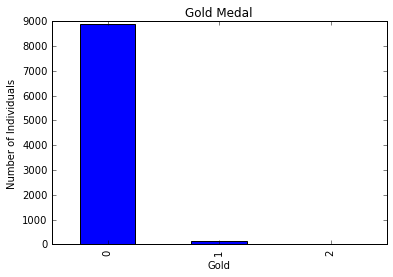

In [78]:
athletes['gold'].value_counts().plot(kind='bar')

plt.title("Gold Medal")

plt.xlabel("Gold")
plt.ylabel("Number of Individuals")

***Silver Medal:***

In [80]:
athletes['silver'].value_counts()

0    8882
1     152
2       4
Name: silver, dtype: int64

In [81]:
athletes['silver'].value_counts(normalize=True)

0    0.982740
1    0.016818
2    0.000443
Name: silver, dtype: float64

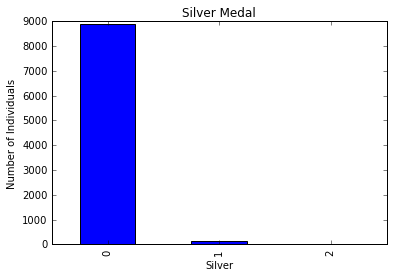

In [82]:
athletes['silver'].value_counts().plot(kind='bar')

plt.title("Silver Medal")

plt.xlabel("Silver")
plt.ylabel("Number of Individuals")

***Bronze Medal:***

In [83]:
athletes['bronze'].value_counts()

0    8864
1     172
2       2
Name: bronze, dtype: int64

In [84]:
athletes['bronze'].value_counts(normalize=True)

0    0.980748
1    0.019031
2    0.000221
Name: bronze, dtype: float64

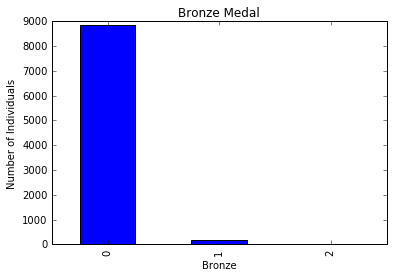

In [85]:
athletes['bronze'].value_counts().plot(kind='bar')

plt.title("Bronze Medal")

plt.xlabel("Bronze")
plt.ylabel("Number of Individuals")

***Total Medals:***

In [86]:
athletes['total'].value_counts()

0    8587
1     418
2      25
3       4
4       3
5       1
Name: total, dtype: int64

In [87]:
athletes['total'].value_counts(normalize=True)

0    0.950100
1    0.046249
2    0.002766
3    0.000443
4    0.000332
5    0.000111
Name: total, dtype: float64

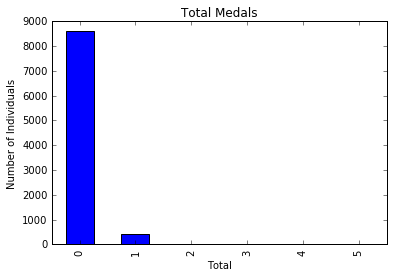

In [91]:
athletes['total'].value_counts().plot(kind='bar')

plt.title("Total Medals")

plt.xlabel("Total")
plt.ylabel("Number of Individuals")

<br><br>***Data Modelling***
<br><br>***Model #1:*** Features are *** Age, Height,*** and ***Weight***

In [4]:
feature_cols = ['age', 'height', 'weight']
target_col = ['sport']
athletes[feature_cols][0:20]

,age,height,weight
0,23,170,60
1,33,193,125
2,30,187,76
4,26,178,85
5,27,182,80
6,30,182,73
7,23,187,75
8,27,190,80
12,28,173,60
13,28,171,64


In [5]:
X = athletes[feature_cols].values
print(X)
y = athletes[target_col].values.ravel()
print(y)
print(X.shape, y.shape)

[[  23.  170.   60.]
 [  33.  193.  125.]
 [  30.  187.   76.]
 ..., 
 [  27.  180.   87.]
 [  25.  173.   62.]
 [  24.  221.  110.]]
['Judo' 'Athletics' 'Athletics' ..., 'Handball' 'Athletics' 'Basketball']
(9038, 3) (9038,)


<br><br>***Label Encoder***:
<br>
Use a label encoder to make each sport into a number, in order to input it into the model

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.ravel())

LabelEncoder()

In [7]:
le.classes_

array(['Archery', 'Athletics', 'Badminton', 'Basketball',
       'Beach Volleyball', 'Canoe Slalom', 'Canoe Sprint', 'Cycling',
       'Cycling - BMX', 'Cycling - Mountain Bike', 'Cycling - Road',
       'Cycling - Track', 'Diving', 'Equestrian', 'Fencing', 'Football',
       'Handball', 'Hockey', 'Judo', 'Modern Pentathlon', 'Rowing',
       'Sailing', 'Shooting', 'Swimming', 'Table Tennis', 'Tennis',
       'Triathlon', 'Volleyball', 'Water Polo', 'Weightlifting',
       'Wrestling'], dtype=object)

In [8]:
print(y)
target = le.transform(y).ravel()
print(target)

['Judo' 'Athletics' 'Athletics' ..., 'Handball' 'Athletics' 'Basketball']
[18  1  1 ..., 16  1  3]


<br><br>
***Model #1a:*** Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [11]:
X_test = np.array([[23., 170., 60.], [33., 193., 125.]])
knn.predict(X_test)

array(['Wrestling', 'Athletics'], dtype=object)

***Accuracy Score:*** 80.8%

In [12]:
from sklearn import metrics

y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)


0.80792210666076569

We should be getting 100% because we are predicting the points that we have!  BUT! We get 80% because there are some athletes that have the same sizes and age in different sports!

In [13]:
y_pred

array(['Wrestling', 'Athletics', 'Athletics', ..., 'Water Polo',
       'Athletics', 'Basketball'], dtype=object)

In [14]:
y

array(['Judo', 'Athletics', 'Athletics', ..., 'Handball', 'Athletics',
       'Basketball'], dtype=object)

Certain athletes have the same stats.  We did our analysis on points that we know the answer to. Now, we will take out the points we know by using Cross Validation.
<br><br>
***Accuracy Score:*** 18%

In [15]:
from sklearn.cross_validation import LeaveOneOut, cross_val_score

loo = LeaveOneOut(len(y))
c_score = cross_val_score(knn, X, y, cv=loo)

In [16]:
c_score

array([ 0.,  1.,  0., ...,  0.,  0.,  1.])

In [17]:
(sum(c_score))/len(c_score)

0.17946448329276388

In [18]:
from sklearn.cross_validation import KFold

FEATURE_COLS = ['age', 'height', 'weight']
TARGET_COL = ['sport']

Xtest = athletes[FEATURE_COLS].values
ytest = athletes[TARGET_COL].values.ravel()

# Create the model
knntest = KNeighborsClassifier(n_neighbors=1, metric='euclidean');
knntest.fit(Xtest, ytest);

# Cross-validation
loo = KFold(n=len(Xtest), n_folds=10);
cross_val_score(knntest, Xtest, ytest, cv=loo)

array([ 0.1880531 ,  0.19026549,  0.18141593,  0.15044248,  0.16814159,
        0.16150442,  0.19358407,  0.17809735,  0.17497231,  0.1683278 ])

We determine that we have to work on improving our accuracy.  Should we scale the features?  All between 0 and 1?  What other methods can we try?

In [1]:
#confusion matrix, saying this person belongs to this sport, and this is what we predicted
#cross-val kfold and confusion matrix
#What is my conclusion, how would i support it.
#i can predict what sport they play based on this conclusion. What can i show to convince them
#graphs or visuals to demonstrate that.

In [2]:
#show cluster graph
#2 dimensional plane, height and weight, age would be diameter (radius of circle).... color code each sport.
#many many graphs